
## Holt-Winters Exponentielle Glätttung (Übung)

**Knobelaufgabe**


Manuals:

* Exponentielle Glättung, Beispiele: https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
* statsmodels.tsa.holtwinters.ExponentialSmoothing: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
* .fit: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit
* .forecast: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.forecast.html#statsmodels.tsa.holtwinters.HoltWintersResults.forecast
* results: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html#statsmodels.tsa.holtwinters.HoltWintersResults



### Vorhersage der Konzentration von CO2 

Im Prinzip funktioniert die Vorhersage genauso wie in der vorigen Übung.

Dennoch schlägt hier der Fit schlägt fehl. Warum?

In [1]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

fn = 'data/demo_co2.csv'

df = pd.read_csv(fn, parse_dates=['date'], index_col='date')
df=df.resample("MS").agg('mean')
df.head(3)

,mydat
date,
1974-05-01,333.1600
1974-06-01,332.0660
1974-07-01,330.7125


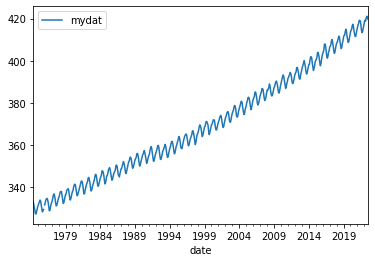

In [2]:
df.plot()
plt.show()


In [4]:
import plotly_express as px

plot = px.line(df)
plot.show()

In [12]:
df_2 = df.copy()
df_2 = df_2.loc['1977-01':] 

In [13]:
import plotly_express as px

plot = px.line(df_2)
plot.show()

In [17]:
df_3 = df.copy()
df_3['value'] = df_3['mydat'].interpolate(method='spline', order=3)
plot_df_3 = px.line(df_3)
plot_df_3.show()

In [20]:
df_4 = df.copy()
df_4["value"] = df_4['mydat'].fillna(method='ffill')
plot_df_4 = px.line(df_4)
plot_df_4.show()


# Kaputte Daten weggeworfen

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
dh = df_2.copy()

sc = MinMaxScaler(feature_range = (0.00001,1))
dh['scal'] = sc.fit_transform(dh)

dmodel = ExponentialSmoothing(dh["scal"], trend='add',  seasonal='add', use_boxcox=True,
                           seasonal_periods=12).fit()

dh['fitted'] = sc.inverse_transform([dmodel.fittedvalues.tolist()])[0,:]
dhfc = pd.DataFrame(dmodel.forecast(36))
dhfc['forecast'] = sc.inverse_transform([dhfc.iloc[:,0].tolist()])[0,:]

result = pd.concat([df["mydat"], dh["fitted"], dhfc['forecast']], axis=1)

plot = px.line(result)
plot.show()


# Daten interpoliert

In [21]:
df_3 = df.copy()
df_3['value'] = df_3['mydat'].interpolate(method='spline', order=3)
plot_df_3 = px.line(df_3)
plot_df_3.show()

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
dh = df_3.copy()
dh = dh["value"]

sc = MinMaxScaler(feature_range = (0.00001,1))
dh['scal'] = sc.fit_transform(dh)

dmodel = ExponentialSmoothing(dh["scal"], trend='add',  seasonal='add', use_boxcox=True,
                           seasonal_periods=12).fit()

dh['fitted'] = sc.inverse_transform([dmodel.fittedvalues.tolist()])[0,:]
dhfc = pd.DataFrame(dmodel.forecast(36))
dhfc['forecast'] = sc.inverse_transform([dhfc.iloc[:,0].tolist()])[0,:]

result = pd.concat([df_3["value"], dh["fitted"], dhfc['forecast']], axis=1)

plot = px.line(result)
plot.show()

ValueError: Expected 2D array, got 1D array instead:
array=[333.16       332.066      330.7125     329.0975     327.328
 327.335      328.3425     329.662      330.7775     331.5325
 332.144      333.175      333.9125     333.378      331.6825
 329.784      328.32       328.64333333 329.43       331.07731593
 331.6        332.698      333.8325     334.4575     334.698
 334.14       332.9375     330.698      328.835      328.918
 330.46       331.915      332.752      333.4775     334.995
 336.19       336.86       336.0725     334.564      332.3625
 331.1275     331.4        332.5925     333.685      335.012
 335.3725     336.7475     337.818      338.035      337.9175
 336.22       334.3325     332.3025     332.564      333.8625
 334.99       336.5175     336.7        338.4125     338.864
 339.2175     339.2075     337.454      335.58       333.894
 334.375      335.4575     336.972      337.9125     338.48
 340.078      341.07       341.44       341.202      339.2075
 337.448      335.9675     336.2575     337.412      338.4025
 339.3975     340.5275     341.718      342.7        342.988
 342.285      340.6925     338.306      336.75       337.1425
 338.764      339.9825     341.098      341.9525     342.66666667
 344.245      344.654      343.775      342.355      340.174
 338.2225     338.518      339.6075     340.92       341.712
 342.775      343.805      345.435      346.1        345.68
 344.076      341.78666667 340.435      340.692      341.9475
 343.22       344.274      344.985      345.7        347.76
 347.67       347.1625     345.716      343.615      341.562
 342.03       343.385      345.12       345.5275     346.46
 348.03       348.7525     349.2925     348.436      346.7525
 344.8975     343.324      343.51       344.7925     346.186
 346.79       347.4975     348.23       350.125      350.515
 349.916      348.0925     345.984      345.43       344.8575
 346.434      347.5025     348.7425     348.9525     350.072
 351.385      352.188      351.3025     350.1575     348.02
 346.48       346.8325     348.202      349.4025     350.792
 351.97       352.3625     353.7275     354.318      353.795
 352.432      350.2525     348.9675     349.478      350.5225
 351.7025     353.084      353.5275     354.13       355.738
 356.03       355.325      353.9        351.56       350.02
 350.428      351.7775     353.04       353.97       355.1825
 355.7625     356.5        357.415      356.3        354.772
 352.8775     351.326      351.81       353.25       354.468
 355.0375     355.9025     357.636      358.8675     359.255
 358.064      355.9525     353.8275     352.274      352.6325
 353.9375     355.404      356.2775     357.24       358.014
 359.425      359.844      359.1175     356.785      354.768
 353.1425     353.3825     354.48       355.8625     357.172
 357.735      358.62       359.445      360.294      359.4425
 357.3875     355.562      354.1525     354.362      355.8
 357.1475     358.348      359.08       360.43       361.435
 361.728      360.79       359.352      357.285      355.8225
 356.318      357.8325     359.1925     360.078      361.26
 362.0175     363.322      364.05       363.185      361.532
 358.96       358.465      358.264      359.7125     361.068
 362.31       363.485      364.298      364.84       365.2475
 364.986      363.275      361.56       359.652      359.8175
 361.085      362.436      363.305      364.215      364.858
 366.58       366.7675     365.642      364.26       362.144
 360.22       361.0425     362.942      364.665      365.395
 366.105      367.568      368.8125     369.57       368.865
 367.945      365.9        364.02       364.5725     365.886
 367.38       368.58       368.8725     370.3225     371.195
 371.088      370.28       369.545      366.768      364.9525
 365.664      367.1375     368.3525     369.552      369.925
 370.845      371.81       371.9975     371.8175     369.846
 368.1        367.0925     367.284      368.61       369.968
 370.88       371.865      372.585      373.568      374.04
 373.345      371.552      369.595      368.322      368.7375
 370.0775     371.61       372.7575     373.37       374.412
 375.48       375.8775     375.548      373.93       371.8375
 370.794      370.9        372.5075     374.06       375.13
 375.855      376.68       378.1625     378.7575     378.364
 376.7        374.212      373.3275     373.3        374.968
 376.325      377.2625     378.118      379.2775     380.625
 380.716      379.87       377.5225     375.942      374.475
 374.782      376.625      377.765      378.776      380.275
 381.0125     382.47       382.656      382.2775     380.73
 378.61       376.7825     377.4075     378.77       380.405
 381.65       382.4375     382.9625     384.878      385.1775
 384.145      382.458      380.2725     379.0225     379.366
 380.54       382.086      383.36       384.415      384.885
 386.702      386.805      386.2475     384.486      382.25
 381.14       381.5125     382.7825     384.338      385.9975
 385.9025     386.674      387.2        388.9575     388.035
 385.875      384.158      383.2775     383.4175     384.582
 385.975      387.245      387.675      389.104      389.83
 390.332      389.4225     388.1875     386.12       384.7325
 384.7        386.38       387.915      389.114      390.4775
 391.3575     392.8175     393.218      392.0775     390.335
 388.456      386.8725     387.608      389.155      390.0225
 391.644      391.9925     393.015      393.425      394.442
 393.775      392.46       390.1075     389.1875     389.294
 390.6675     392.205      393.37       394.16       394.6225
 396.516      396.8225     395.895      394.454      392.425
 391.252      391.4075     393.33       394.608      395.95
 397.0975     397.824      398.8475     400.005      398.76
 397.27       395.235      393.694      394.015      395.4175
 397.092      398.1275     398.24       400.234      401.675
 401.935      401.28       398.8825     397.046      395.38
 396.2775     397.604      399.425      400.125      400.555
 401.732      403.7225     404.002      402.795      401.32
 398.99       397.58       398.58       400.322      402.29
 403.166      404.165      405.16       407.8075     407.884
 406.8625     404.348      402.1        401.1675     402.024
 403.9325     404.6725     406.378      406.7925     407.4325
 409.254      410.0225     408.995      407.228      405.0625
 403.49       403.886      405.6325     407.13       408.2375
 408.675      409.62       410.408      411.6475     410.955
 408.764      407.0025     405.714      406.3625     408.37
 409.384      411.2075     412.0675     412.138      413.92
 414.9125     414.064      411.5175     410.135      408.658
 408.9825     410.4775     412.118      413.6875     414.35
 414.936      416.59       417.282      416.245      414.455
 412.602      411.455      411.52       413.16       414.4875
 415.8        416.9275     417.62       419.1125     419.114
 418.735      416.835      414.316      413.28       413.99
 415.3425     416.815      418.34       419.24       418.8525
 420.2225     421.074      420.8775     419.73      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.